In [1]:
import sys
import os
sys.path.append("../..")
from diachr.diachromatic_interaction_set import DiachromaticInteractionSet
from diachr.diachromatic_interaction import DiachromaticInteraction

## Reproduction of published plots generated with `TIMViz` module

We used the module `TIMViz` to create the tringle interaction map shown in **Figure 3A**. Interactions are represented as polygons along the genomic axis. The module is implemented here:

In [8]:
from diachr.TIMViz import TIMViz

How to use this module is demonstrated [here](../usage/triangle_interaction_maps.ipynb).

### Input data

There is capture Hi-C data for 17 cell types. We prepared interaction files with `DICer` and placed them in a local directory structure. If you do not have this directory structure, enter your path to an interaction file at the bottom of the the following cell.

In [9]:
#CELL_TYPE_SHORT = 'MK'            # Has HC data
#CELL_TYPE_SHORT = 'ERY'           # Has HC data
#CELL_TYPE_SHORT = 'NEU'           # Has HC data
#CELL_TYPE_SHORT = 'MON'           # Has HC data
CELL_TYPE_SHORT = 'MAC_M0'        # Has HC data
#CELL_TYPE_SHORT = 'MAC_M1'
#CELL_TYPE_SHORT = 'MAC_M2'
#CELL_TYPE_SHORT = 'EP'
#CELL_TYPE_SHORT = 'NB'            # Has HC data
#CELL_TYPE_SHORT = 'TB'
#CELL_TYPE_SHORT = 'FOET'
#CELL_TYPE_SHORT = 'NCD4'          # Has HC data
#CELL_TYPE_SHORT = 'TCD4'
#CELL_TYPE_SHORT = 'NACD4'
#CELL_TYPE_SHORT = 'ACD4'
#CELL_TYPE_SHORT = 'NCD8'          # Has HC data
#CELL_TYPE_SHORT = 'TCD8'

PROTOCOL = 'CHC'
MIN_I_DIST = '20000'
FDR = '05'
RPC_RULE = 'ht'
if PROTOCOL == 'CHC':
    INTERACTION_FILE = '../../DICer_interactions/' + RPC_RULE.upper() + '/FDR0' + FDR + '/CHC/JAV_' + CELL_TYPE_SHORT + '_RALT_20000_' + RPC_RULE + '_fdr0.' + FDR + '_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + CELL_TYPE_SHORT + '_CHC_RALT_' + MIN_I_DIST + '_' + RPC_RULE.lower()
if PROTOCOL == 'HC':
    INTERACTION_FILE = '../../DICer_interactions/' + RPC_RULE.upper() + '/FDR0' + FDR + '/HC/' + MIN_I_DIST + '/JAV_' + CELL_TYPE_SHORT + '_HC_RALT_' + MIN_I_DIST + '_' + RPC_RULE + '_fdr0.' + FDR + '_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + CELL_TYPE_SHORT + '_HC_RALT_'  + MIN_I_DIST + '_' + RPC_RULE.lower()
if PROTOCOL == 'HC_POOLED':
    INTERACTION_FILE = '../../DICer_interactions/HT/FDR0' + FDR + '/HC/20000/JAV_ALL_HC_RALL_ALT_20000_ht_fdr0.' + FDR + '_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + 'POOLED_HC_FDR005' + '_HC_RALT_20000_' + RPC_RULE.lower()
    
#INTERACTION_FILE = '<YOUR_PATH_TO_AN_INTERACTION_FILE>'

Load the BED file with all regions of baited digests.

In [10]:
BAIT_BED_FILE = '../../additional_files/javierre_2016/javierre_baited_digests_hg38.bed'

Create a `CHCTadViz` object.

In [11]:
visualizer = TIMViz(i_file=INTERACTION_FILE, t_file=None, b_file=BAIT_BED_FILE, verbose=True)

[INFO] Initializing DirectedTadVisualizer object ...
	[INFO] Reading interactions and group them by chromosomes ...
		chr2: 814,141 interactions
		chr3: 673,663 interactions
		chr6: 598,182 interactions
		chr9: 403,820 interactions
		chr12: 534,877 interactions
		chr10: 454,651 interactions
		chr7: 458,081 interactions
		chrX: 200,858 interactions
		chr4: 504,368 interactions
		chr1: 981,090 interactions
		chr11: 590,388 interactions
		chr18: 189,836 interactions
		chr5: 596,726 interactions
		chr16: 230,255 interactions
		chr8: 466,733 interactions
		chr14: 360,235 interactions
		chr19: 211,193 interactions
		chr15: 291,928 interactions
		chr20: 251,324 interactions
		chr13: 256,116 interactions
		chr22: 131,978 interactions
		chr17: 324,390 interactions
		chr21: 120,460 interactions
		chrY: 2,917 interactions
	[INFO] ... done.
	[INFO] Reading baited digest regions and group them by chromosomes ...
		chr1: 2,272 Baits
		chr10: 941 Baits
		chr11: 1,400 Baits
		chr12: 1,199 Baits
		chr1

### Visualize HT configurations of unbalanced interactions

If `color_i_cats=False`, then interactions are colored according to their HT configurations. The colors were assigned as follows:

```
'01': 'pink',
'02': 'red',
'03': 'lime',
'12': 'magenta',
'13': 'blue',
'23': 'turquoise'
```

### Separat triangle interaction maps for the enrichment states `NE` and `EN`

We generate triangle interaction maps for the following region:

In [12]:
chrom = 'chr1'
begin = 23000000
end = 25000000
pdf_file_name_prefix = 'TadViz_ht_tag_' + chrom + ':' + str(begin) + '-' + str(end)

For the selcted region, we generate four triangle interaction map, one for each enrichment status (`NE` and `EN`) and interaction categories unbalanced (`DIX`, `DI`) and balanced (`UIR` and `UI`).

Creating plots for: chr1:23000000-25000000
	e_cat: NE
		i_cat_list: ['DIX', 'DI']
		i_cat_list: ['UIR', 'UI']
	e_cat: EN
		i_cat_list: ['DIX', 'DI']
		i_cat_list: ['UIR', 'UI']


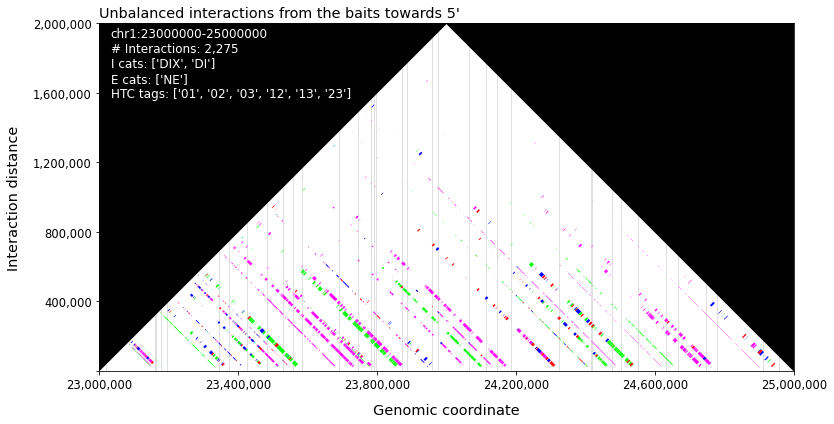

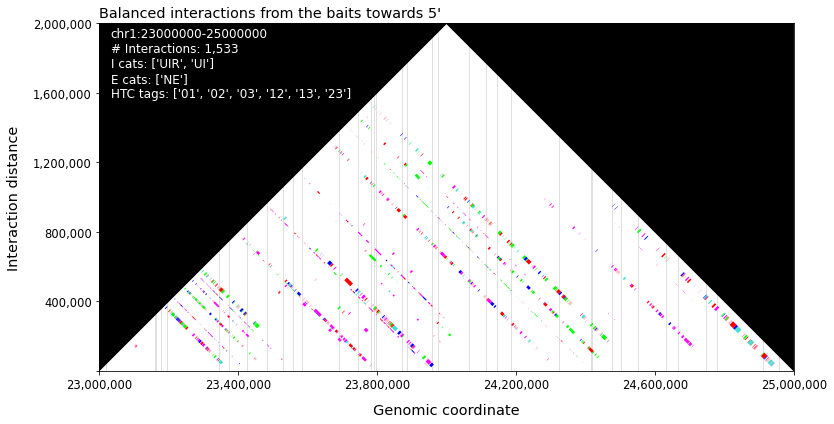

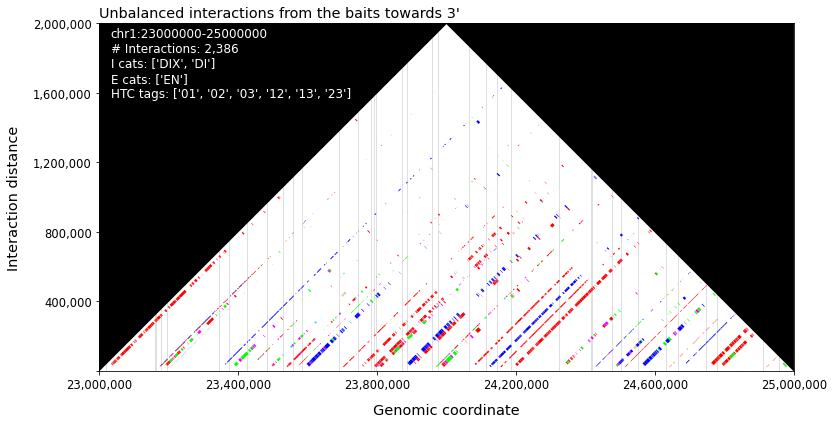

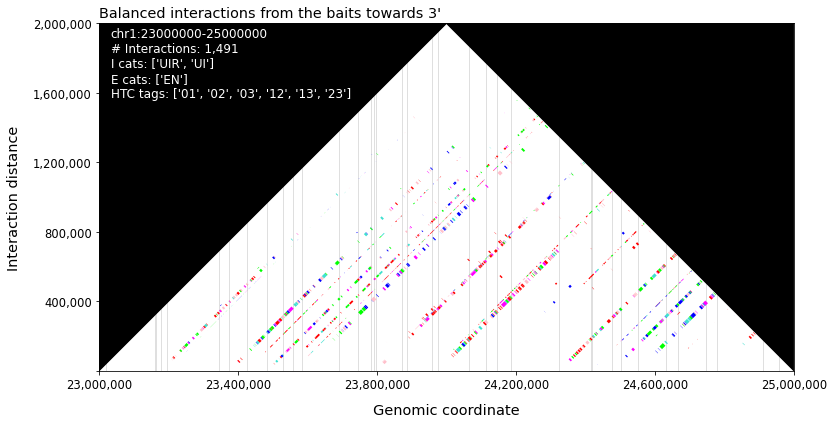

In [13]:
print('Creating plots for: ' + chrom + ':' + str(begin) + '-' + str(end))
for e_cat in ['NE', 'EN']:
    print("\te_cat: " + e_cat)
    for i_cat_list in [['DIX', 'DI'], ['UIR', 'UI']]:
        print("\t\ti_cat_list: " + str(i_cat_list))
        if i_cat_list == ['DIX', 'DI']:
            plot_title = 'Unbalanced interactions'
        if i_cat_list == ['UIR', 'UI']:
            plot_title = 'Balanced interactions'
        if e_cat == 'NE':
            plot_title = plot_title + ' from the baits towards 5\''
        if e_cat == 'EN':
            plot_title = plot_title + ' from the baits towards 3\''
        TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                        begin = begin,
                                        end = end,
                                        inter_cat_list = i_cat_list,
                                        enr_cat_list = [e_cat],
                                        color_i_cats=False,
                                        pp_linewidth=0,
                                        transparent_polygons=False,           
                                        plot_title = plot_title,
                                        pdf_file_name = pdf_file_name_prefix + '_' + e_cat + '_' + str(i_cat_list).replace(" ", "")  + '.pdf',
                                        verbose=False)

### Triangle interaction maps for a few baited digests and not separated for `NE` and `EN`

In [14]:
chrom = 'chr1'
begin = 23600000
end = 24400000
pdf_file_name_prefix = 'TadViz_ht_tag_' + chrom + ':' + str(begin) + '-' + str(end)

Creating plots for: chr1:23600000-24400000
		i_cat_list: ['DIX', 'DI']
		i_cat_list: ['UIR', 'UI']


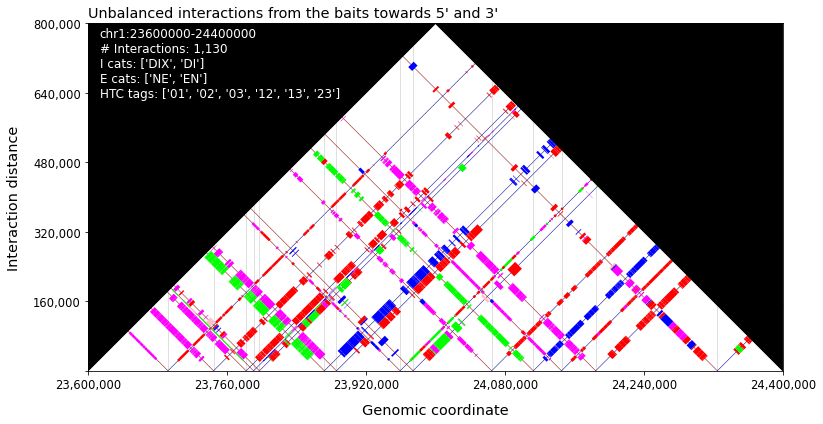

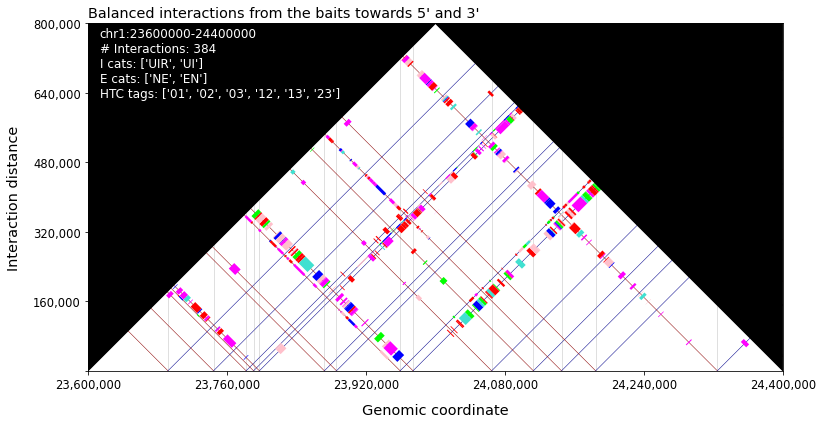

In [15]:
print('Creating plots for: ' + chrom + ':' + str(begin) + '-' + str(end))
for i_cat_list in [['DIX', 'DI'], ['UIR', 'UI']]:
    print("\t\ti_cat_list: " + str(i_cat_list))
    if i_cat_list == ['DIX', 'DI']:
        plot_title = 'Unbalanced interactions'
    if i_cat_list == ['UIR', 'UI']:
        plot_title = 'Balanced interactions'
    plot_title = plot_title + ' from the baits towards 5\' and 3\''
    TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                    begin = begin,
                                    end = end,
                                    inter_cat_list = i_cat_list,
                                    enr_cat_list = ['NE','EN'],
                                    color_i_cats=False,
                                    pp_linewidth=0,
                                    plot_bait_diagonals=True,
                                    transparent_polygons=False,           
                                    plot_title = plot_title,
                                    pdf_file_name = pdf_file_name_prefix + '_' + str(i_cat_list).replace(" ", "") + '.pdf',
                                    verbose=False)

### Slide a window along the genome

Creating plot for: chr15:89964732-90964732
Creating plot for: chr15:90464732-91464732
Creating plot for: chr15:90964732-91964732
Creating plot for: chr15:91464732-92464732
Creating plot for: chr15:91964732-92964732
Creating plot for: chr15:92464732-93464732


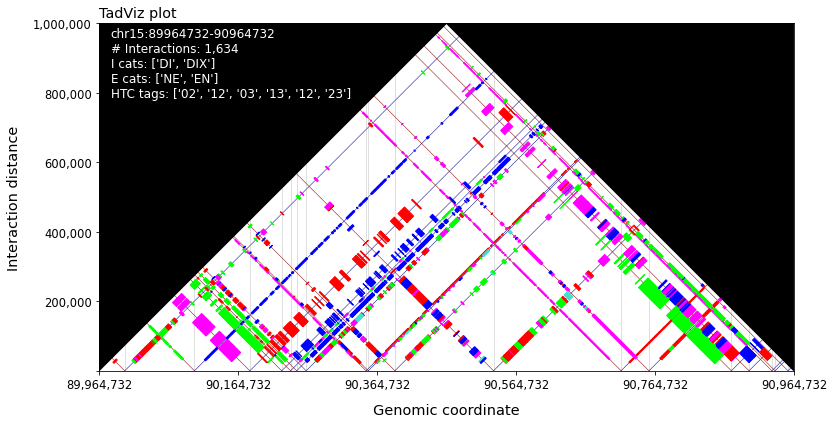

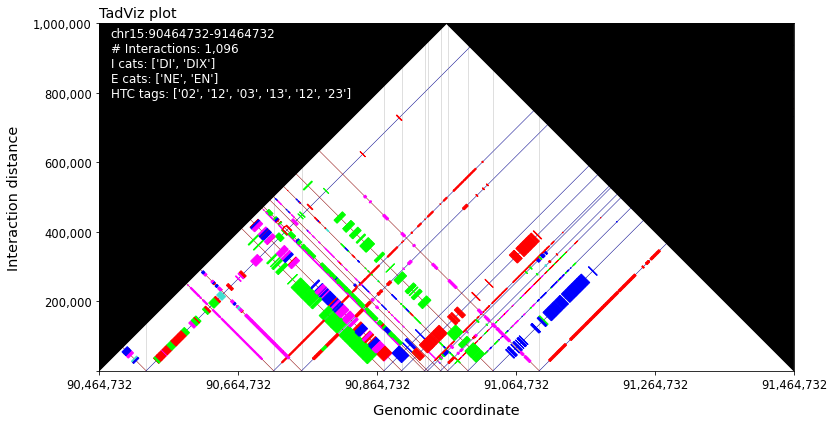

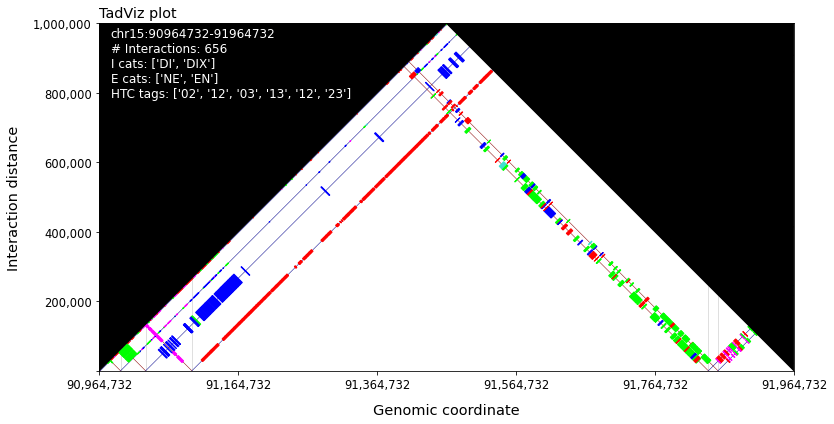

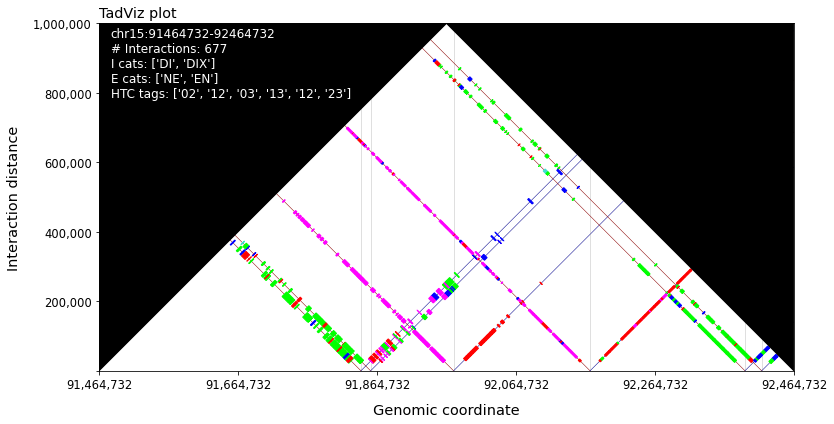

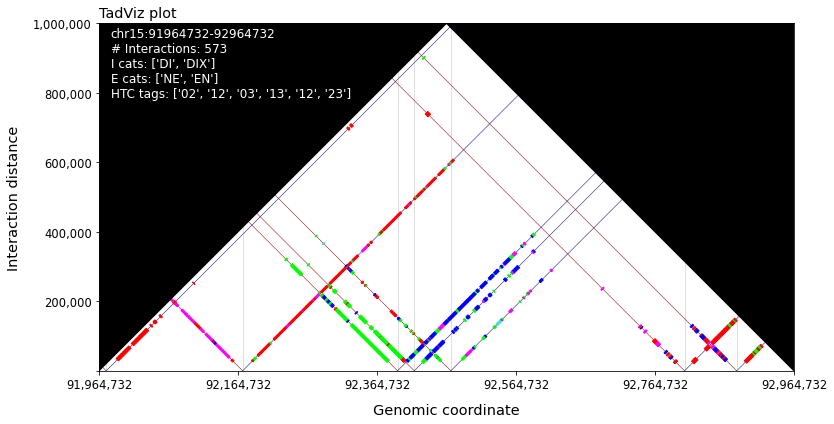

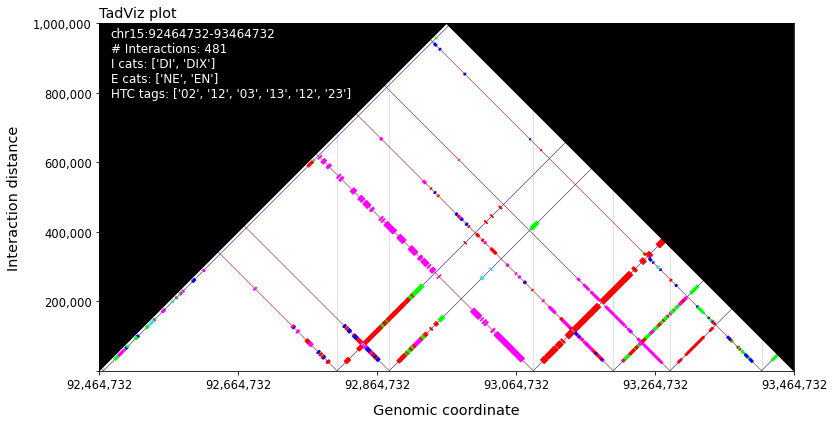

In [16]:
#chr1:9500000-10000000
#chr10:110245376-110745376
#chr10:78816398-79316398
#chr15:90464732-90964732
#chr6:28002505-28502505
#
chrom = 'chr15'
from_pos = 90464732-500000
to_pos = from_pos + 3000000
window_size = 1000000
shift_size = int(window_size/2)
for start_pos in range(from_pos, to_pos, shift_size):
    begin = start_pos
    end = begin + window_size
    print('Creating plot for: ' + chrom + ':' + str(begin) + '-' + str(end))
    TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                    begin = begin,
                                    end = end,
                                    inter_cat_list = ['DI', 'DIX'],
                                    enr_cat_list = ['NE','EN'],
                                    ht_tag_list = ['02','12','03','13','12','23'],
                                    plot_bait_diagonals=True,
                                    transparent_polygons=False, 
                                    color_i_cats=False,
                                    verbose=False)